In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from grid_search_helper import EstimatorSelectionHelper
from prepare_data import prepare_data
%matplotlib inline

In [2]:
df = pd.read_csv('mydata.csv')
data_prep = prepare_data(df)
data_prep.build_dataframes_for_points()
data_prep.time_series_to_regression()

Names of points so you know what
keys to use in get_point_data:
get_point_data('point_26')
get_point_data('point_16')
get_point_data('point_17')
get_point_data('point_14')
get_point_data('point_15')
get_point_data('point_12')
get_point_data('point_13')
get_point_data('point_25')
get_point_data('point_24')
get_point_data('point_27')
get_point_data('point_29')
get_point_data('point_28')
get_point_data('point_0')
get_point_data('point_1')
get_point_data('point_2')
get_point_data('point_3')


In [3]:
X_0 = data_prep.get_point_data('point_0')['X']
y_0 = data_prep.get_point_data('point_0')['y']
X_0_hold_out = data_prep.get_point_data('point_0')['X_hold_out']
y_0_hold_out = data_prep.get_point_data('point_0')['y_hold_out']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size=0.2)

# making

In [ ]:
class All_train_test_split:
    def __init__(self, ):
        

# end

In [5]:
ex_trees = ExtraTreesRegressor(n_estimators=128)
ex_trees.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=128, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [6]:
'Extra Trees:',np.mean((ex_trees.predict(X_test) - y_test) ** 2)

('Extra Trees:', 0.013775755914734221)

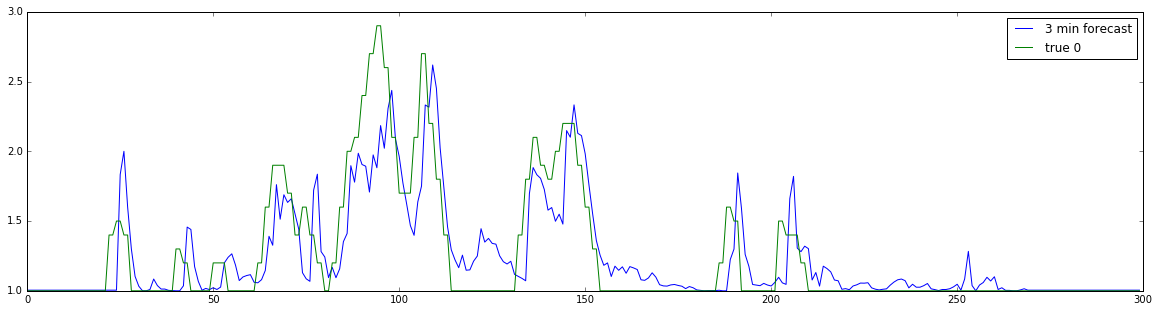

In [7]:
plt.figure(figsize=(20,5))
plt.plot(ex_trees.predict(X_0_hold_out)[:300],label='3 min forecast')
plt.plot(y_0_hold_out[:300],label='true 0')
plt.legend()
plt.show()

# doing grid searches

In [ ]:
'''
These are the models I used grid search cross validation on. I import a class called EstimatorSelectionHelper that
runs through all of the different models their parameters and fits everyone using all possible combinations of
parameters. It then prints out a summary of the results ordered by best performing model from the grid search in
a pandas dataframe.
'''

models1 = {'LinearRegression':LinearRegression(),
           'Ridge':Ridge(),
           'Lasso':Lasso(),
           'ExtraTreesRegressor':ExtraTreesRegressor(),
           'RandomForestRegressor':RandomForestRegressor(),
           'AdaBoostRegressor':AdaBoostRegressor(),
           'GradientBoostingRegressor':GradientBoostingRegressor()}

params1 = {'LinearRegression':{},
           'Ridge':{'alpha':[0.001, 0.01, 0.1, 1.0]},
           'Lasso':{'alpha':[0.001, 0.01, 0.1, 1.0]},
           'ExtraTreesRegressor':{'n_estimators':[8,16,32,64,128]},
           'RandomForestRegressor':{'n_estimators':[8,16,32,64,128]},
           'AdaBoostRegressor':{'n_estimators':[8,16,32,64,128],'learning_rate':[0.6,0.8,1.0]},
           'GradientBoostingRegressor':{'n_estimators':[8,16,32,64,128],'learning_rate':[0.6,0.8,1.0]}}

In [ ]:
helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X_train, y_train, n_jobs=-1)

In [ ]:
helper1.score_summary(sort_by='min_score')